In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [133]:
df = pd.read_csv("/content/dermatology_database_1.csv")
df.drop("age",inplace=True,axis=1)
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,3
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,3


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   erythema                             366 non-null    int64
 1   scaling                              366 non-null    int64
 2   definite_borders                     366 non-null    int64
 3   itching                              366 non-null    int64
 4   koebner_phenomenon                   366 non-null    int64
 5   polygonal_papules                    366 non-null    int64
 6   follicular_papules                   366 non-null    int64
 7   oral_mucosal_involvement             366 non-null    int64
 8   knee_and_elbow_involvement           366 non-null    int64
 9   scalp_involvement                    366 non-null    int64
 10  family_history                       366 non-null    int64
 11  melanin_incontinence                 366 non-null    int64

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [136]:
X , y = df.drop("class",axis=1) , df["class"]

In [137]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [139]:
lr = LogisticRegression()
lr.fit(X_train , y_train)
y_pred_lr = lr.predict(X_test)

In [140]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

<Axes: >

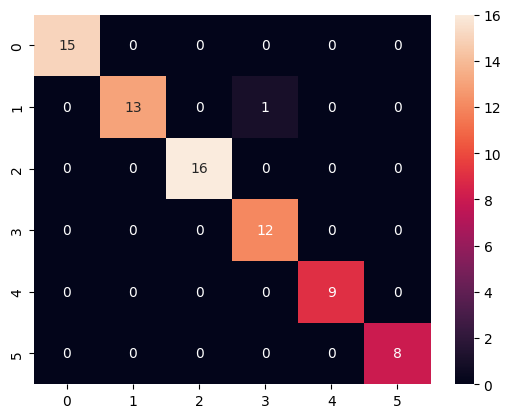

In [143]:
import seaborn as sns

cm = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d')

<Axes: >

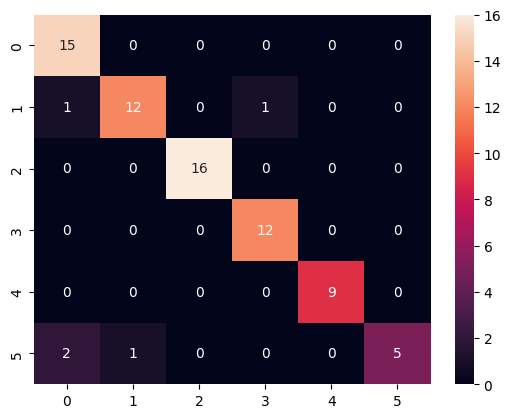

In [144]:
cm = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_lr)

0.9864864864864865

In [146]:
accuracy_score(y_test,y_pred_dt)

0.9324324324324325